<a href="https://colab.research.google.com/github/Yurim222/2022F-Ajou_ML/blob/main/HW3_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW3 :: Parameter Tuning and Classifcation**

## 코랩과 구글 드라이브 연동 OR 로컬에서 파일 업로드
- 해당 섹션 코드 수정 가능

In [ ]:
# 연동 OR 파일 업로드
# 연동 시 path 설정 주의

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

## 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('airline_sampled2.csv') 
# HW1에서 사용한 데이터를 샘플링한 파일이므로 꼭 제공된 csv 파일을 사용할 것

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,8827,8858,0,1,27,1,2,183,4,4,...,5,4,3,4,3,4,5,0,7.0,0
1,3588,3601,1,0,22,1,0,829,2,3,...,1,1,3,3,3,3,1,4,4.0,0
2,1011,1017,0,0,23,1,2,1020,4,5,...,4,3,4,5,3,5,4,0,0.0,1
3,7212,7237,1,0,21,1,0,1028,4,4,...,3,3,3,2,5,4,3,0,0.0,1
4,5025,5044,1,1,67,0,0,626,3,4,...,2,2,3,2,5,2,3,0,0.0,0


## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.


In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('satisfaction', axis=1)
y = df['satisfaction']
y=y.astype('int')
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (800, 24)
y_train's shape :  (800,)

X_val's shape :  (100, 24)
y_val's shape :  (100,)

X_test's shape :  (100, 24)
y_test's shape :  (100,)


## 문제1 KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.



In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

=== best parameter === 
 거리척도: MANHATTAN 
 K :  31
(900, 24)
(900,)
final test accuracy =  0.65


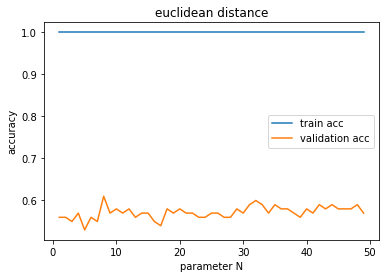

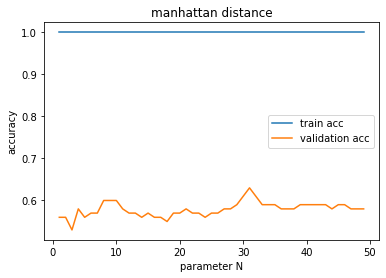

In [6]:
### 문제 1 ###
### 코드 작성 ###
from matplotlib.pyplot import figure
from sklearn.metrics import accuracy_score
import pandas as pd

K = range(1, 50)

euclidean_train_acc = []
euclidean_val_acc = []
fig = plt.figure() 
fig.add_subplot(111)
for n in K:
  knn = KNeighborsClassifier(n_neighbors = n, metric = "euclidean", weights = "distance")
  knn.fit(X_train, y_train)
  euclidean_train_acc.append(knn.score(X_train, y_train))
  if n>1:
    if knn.score(X_val, y_val)>max(euclidean_val_acc):
      euclidean_parameter = n
      euclidean_score = knn.score(X_val, y_val)
  else:
    euclidean_score = knn.score(X_val, y_val)
  euclidean_val_acc.append(knn.score(X_val, y_val))

plt.title("euclidean distance")
plt.plot(K, euclidean_train_acc, label = "train acc")
plt.plot(K, euclidean_val_acc, label = "validation acc")
plt.xlabel("parameter N")
plt.ylabel("accuracy")
plt.legend()


manhattan_train_acc = []
manhattan_val_acc = []
fig = plt.figure() 
fig.add_subplot(111)
for n in K:
  knn = KNeighborsClassifier(n_neighbors = n, metric = "manhattan", weights = "distance")
  knn.fit(X_train, y_train)
  manhattan_train_acc.append(knn.score(X_train, y_train))
  if n>1:
    if knn.score(X_val, y_val)>max(manhattan_val_acc):
      manhattan_parameter = n
      manhattan_score = knn.score(X_val, y_val)
  else:
    manhattan_score = knn.score(X_val, y_val)
  manhattan_val_acc.append(knn.score(X_val, y_val))

plt.title("manhattan distance")
plt.plot(K, manhattan_train_acc, label = "train acc")
plt.plot(K, manhattan_val_acc, label = "validation acc")
plt.xlabel("parameter N")
plt.ylabel("accuracy")
plt.legend()

if euclidean_score > manhattan_score:
  print("=== best parameter === \n 거리척도: EUCLIDEAN \n K : ", euclidean_parameter)
  final_distance = "euclidean"
  final_parameter = euclidean_parameter
else:
  print("=== best parameter === \n 거리척도: MANHATTAN \n K : ", manhattan_parameter)
  final_distance = "manhattan"
  final_parameter = manhattan_parameter


X_final_train = pd.concat([X_train,X_val])
print(X_final_train.shape)

y_final_train = pd.concat([y_train, y_val])
print(y_final_train.shape)

knn=KNeighborsClassifier(n_neighbors = final_parameter, metric = final_distance)
knn.fit(X_final_train,y_final_train)
print("final test accuracy = ", knn.score(X_test,y_test))

**설명 작성**  
- 최적의 파라미터: 거리 척도는 manhattan이며 거리는 20이다.
- 설명: 각각의 K 값의 경우에 대한 정확도를 모두 비교한 후 가장 높은 정확도를 가지고 있는 경우 그 파라미터의 정보를 얻어온다.

---

## 문제2 Random Forest


- Scikit-learn 라이브러리를 이용하여 Random Forest의 최적의 파라미터를 찾는다.
    - Criterion 중 최소 두개를 비교한다.
    - 최적의 파라미터 max depth 값을 찾는다.
    - 파라미터에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 max depth 값, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
### 문제 2 ###
### 코드 작성 ###
from  sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

cv = KFold(n_splits=5)
accuracies = list()
max_attributes=X_test.shape[1]
depth_range = range(1, max_attributes)


for depth in depth_range:
  fold_accuracy= []
  rand_clf = RandomForestClassifier(max_depth = depth)
  #print("current max_deth: ", depth, "\n")

  model = rand_clf.fit(X_train, y_train)
  valid_acc = model.score(X_test, y_test)
  fold_accuracy.append(valid_acc)

  avg = sum(fold_accuracy)/len(fold_accuracy)
  accuracies.append(avg)

df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))



 Max Depth  Average Accuracy
         1              0.81
         2              0.86
         3              0.86
         4              0.87
         5              0.90
         6              0.93
         7              0.93
         8              0.92
         9              0.92
        10              0.92
        11              0.93
        12              0.95
        13              0.92
        14              0.92
        15              0.92
        16              0.92
        17              0.93
        18              0.93
        19              0.92
        20              0.92
        21              0.91
        22              0.93
        23              0.92


**설명 작성**  
- 최적의 파라미터: Max Depth = 9
- 설명: Max_Depth가 9인것 이후부터 정확도가 점점 떨어지기 시작하므로 가장 최적의 파라미터는 max depth가 9일 때 라고 생각한다.

---

## 문제3 Cross validation with Linear SVM
### 3-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 3-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [ ]:
### 문제 3-1 ###
### 코드 작성 ###
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5)

mean = []
score = []

max_c = range(1, 10)
for i in max_c:
  train_acc = []
  test_acc= []
  k_fold = svm.SVC(kernel = 'linear', C=i)
  linear_acc = cross_val_score(k_fold, X_train, y_train, cv=5, scoring="accuracy")
  score.append(linear_acc)
  mean.append(linear_acc.mean())

fig=plt.figure()
fig.add_subplot(111)
plt.title("C값에 대한 정확도")
plt.plot(max_c, mean, label = 'MEAN accuracy')
plt.plot(max_c, np.array(score)[:,0], label = '1-fold accuracy')
plt.plot(max_c, np.array(score)[:,1], label = '2-fold accuracy')
plt.plot(max_c, np.array(score)[:,2], label = '3-fold accuracy')
plt.plot(max_c, np.array(score)[:,3], label = '4-fold accuracy')
plt.plot(max_c, np.array(score)[:,4], label = '5-fold accuracy')
plt.xlabel('max_c_value')
plt.ylabel('accuracy')
plt.legend()

for n in max_c:
  if mean[n-1]==max(mean):
    best_parameter = n
    break

print("===best parameter ===\n max_c_value : ", best_parameter)
k_fold = svm.SVC(kernel = 'linear', C=best_parameter)
k_fold.fit(X_final_train, y_final_train)
print("final test accuracy = ", k_fold.score(X_test, y_test), "\n\n")


**설명 작성**  
- 최적의 파라미터:
- 설명:

===best parameter ===
 max_c_value :  6
final test accuracy =  0.8 




/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_

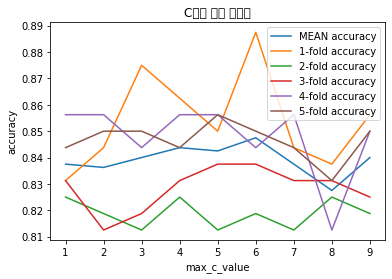

In [10]:
### 문제 3-2 ###
### 코드 작성 ###
from sklearn.model_selection import KFold
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from matplotlib import pyplot as plt


mean = []
score = []

max_c = range(1, 10)
for i in max_c:
  train_acc = []
  test_acc= []
  loo = LeaveOneOut()
  linear_svm = SVC(kernel = 'linear', C=i)
  linear_svm.fit(X_train, y_train)
  linear_acc = cross_val_score(linear_svm, X_train, y_train, cv=5, scoring="accuracy")
  score.append(linear_acc)
  mean.append(linear_acc.mean())

fig=plt.figure()
fig.add_subplot(111)
plt.title("C값에 대한 정확도")
plt.plot(max_c, mean, label = 'MEAN accuracy')
plt.plot(max_c, np.array(score)[:,0], label = '1-fold accuracy')
plt.plot(max_c, np.array(score)[:,1], label = '2-fold accuracy')
plt.plot(max_c, np.array(score)[:,2], label = '3-fold accuracy')
plt.plot(max_c, np.array(score)[:,3], label = '4-fold accuracy')
plt.plot(max_c, np.array(score)[:,4], label = '5-fold accuracy')
plt.xlabel('max_c_value')
plt.ylabel('accuracy')
plt.legend()

for n in max_c:
  if mean[n-1]==max(mean):
    best_parameter = n
    break

print("===best parameter ===\n max_c_value : ", best_parameter)
linear_final = SVC(kernel = 'linear', C=best_parameter)
linear_final.fit(X_final_train, y_final_train)
print("final test accuracy = ", linear_final.score(X_test, y_test), "\n\n")


**설명 작성**  
- 최적의 파라미터:
- 설명:

---

## 문제4 Regression
문제 4 에서는 캘리포니아 주택 가격 데이터셋을 사용합니다.   
학습을 통해 주택 가격을 예측하는 문제입니다.  
데이터에 대한 자세한 설명은 아래 코드의 description을 참고해주세요.

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

In [ ]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [ ]:
print(df.shape) #(20640, 9)
print(df.describe())

(20640, 9)
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308  

### 문제 4-1 : Adjusted R2 Score
- sklearn.metrics 패키지를 사용하여 ```def adjr2```에 Adjusted R2 Score를 구하는 함수를 작성한다.
- ```def r2```를 사용하여 ```adjr2```를 구현한다.
- 코드 작성 영역 이외의 코드를 수정하지 않는다.
- 주어진 함수 파라미터를 사용하여 구현한다.

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
import numpy as np

def r2(actual, predicted):
    """ R2 Score """
    return r2_score(actual, predicted)

###################################
def adjr2(actual, predicted, rowcount, featurecount):
############ 문제 4-1 ##############
    """ Adjusted R2 Score """
  return 
####################################
####################################

### 문제 4-2 : Feature Selection
- sklearn 패키지를 사용하여 feature selection을 수행하는 함수 ```forward_selection```을 구현한다.
- Linear Regressor 을 사용하여 feature selection이 어떻게 달라지는 지 관찰한다.
- 코드 작성 영역 이외의 코드를 수정하지 않는다.
- 주어진 변수들, 자료들을 최대한 활용하여 코드를 작성한다.

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [ ]:
X = df.drop(columns=['target'])
y = df['target']
y=y.astype('int')
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [ ]:
def forward_selection(X, y): # X: train data, y: train data's target
    initial_list = []
    included = list(initial_list) # 포함되어야 하는 feature
    best_r2 = 0 # 가장 높은 r2 score를 저장

    while True:

        changed = False # while 문을 빠져나가는 조건으로 활용
        excluded = list(set(X.columns)-set(included)) # included list에 없는 column names 저장하는 리스트
        new_scores = dict.fromkeys(excluded)

        for new_column in excluded:
            
            model = LinearRegression()

            ###########################################
            ###### 코드 작성 영역 외 수정 하지 말 것 #########
            ################ 문제 4-2 ##################




        ##############################################
        ##############################################
 
    return included

selected_features = forward_selection(X, y)
print('selected_features:', selected_features)

KeyboardInterrupt: ignored

### 문제 4-3: Regularized Model
- Scikit-learn 라이브러리를 사용하여 Ridge Regression과 Lasso Regression 모델을 만든다.
- train : validation : test **데이터셋의 비율을 8:1:1**로 설정한다.
- 문제 4-1의 **forward selection을 통해 얻은 feature만**을 가진 데이터를 사용한다.
- 다양한 alpha 값에 대해 validation dataset을 사용하여 각 모델에 대한 **최적의 alpha 값을 찾고 찾은 최적의 alpha 값을 텍스트 셀에 작성**한다.
- alpha 값은 아래의 리스트를 사용한다.  
```alpha = [0.0001, 0.001,0.01,0.1,1,10, 100, 1000, 10000, 100000]```
- alpha 값에 대한 R2 score의 변화를 그래프로 나타낸다.
  * **x축: alpha 값**
  * **y축: R2 score 값**
  * 파란색 선: Ridge 결과, 빨간색 선: Lasso 결과
  * 그래프에 **legend**가 포함되어 있어야 한다. 
- **train과 validation dataset을 합하여 train set을 만든 후 최종 학습 결과를 도출**한다.
  * 최적의 alpha 값을 찾을 때 사용한 test set은 변하지 않는다. 
  * r2 score를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
import numpy as np

In [ ]:
### 문제 4-3 ###
### 코드 작성 ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.8)

val_ridge=[]
val_lasso=[]
alpha = [0.0001, 0.001,0.01,0.1,1,10, 100, 1000, 10000, 100000]

for a in alpha:
  ridge = Ridge(alpha=a)
  ridge.fit(X_train, y_train)
  val_ridge.append(r2_score(y_val, ridge.predict(X_val)))
  lasso = Lasso(alpha=a, max_iter = 10000)
  lasso.fit(X_train, y_train)
  val_lasso.append(r2_score(y_val, lasso.predict(X_val)))

for i in range(0,5):
  if val_ridge[i] == max(val_ridge):
    best_ridge=alpha[i]
    break
  if val_lasso[i] == max(val_lasso):
    best_lasso = alpha[i]
    break

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.439e+00, tolerance: 4.495e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.958e+00, tolerance: 4.495e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


best paramenter is 
 best_parameter_ridge:  0.0001 
best_parameter of lasso :  0.01


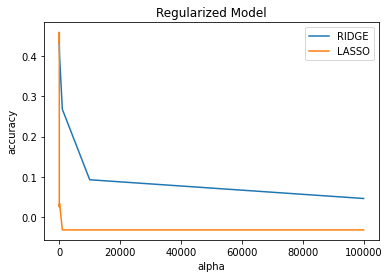

In [ ]:
### 문제 4-3 ###
### 그래프 작성 ###

fig = plt.figure()
fig.add_subplot(111)
plt.title("Regularized Model")
plt.plot(alpha, val_ridge, label = 'RIDGE')
plt.plot(alpha, val_lasso, label = 'LASSO')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()


print("best paramenter is \n best_parameter_ridge: ", best_ridge, "\nbest_parameter of lasso : ", best_lasso)

- Rridge regression 모델 최적의 alpha 값: 0.0001
- Lasso regression 모델 최적의 alpha 값: 0.01

In [ ]:
# 최종 결과 출력
X_final_train = pd.concat([X_train,X_val])
print(X_final_train.shape)

y_final_train = pd.concat([y_train, y_val])
print(y_final_train.shape)

ridge = Ridge(alpha = best_ridge)
ridge.fit(X_final_train, y_final_train)

lasso = Lasso(alpha=best_lasso, max_iter = 10000)
lasso.fit(X_final_train, y_final_train)
 

print("======== final test r2 score ==========\nRIDGE : ", r2_score(y_test, ridge.predict(X_test)), "\nLASSO: ",r2_score(y_test, lasso.predict(X_test)) )

(900, 24)
(900,)
======== final test r2 score ==========
RIDGE :  0.5230452997505429 
LASSO:  0.49816984885931304
